In [1]:
import numpy as np
import os,glob,struct
import xarray as xr
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from parflow import Run
from parflow.tools.fs import exists, chdir, mkdir, cp, rm
from parflow import read_pfb, read_pfb_sequence, ParflowBinaryReader
import os,shutil,copy


In [3]:
root_dir = "/home/hectorb/PARFLOW/PROJECTS/test_cases/hillslope/ara_bele/simus/"
forc_dir = "/home/hectorb/PARFLOW/PROJECTS/test_cases/hillslope/forcings/soudanian/"

In [4]:
hill = Run.from_definition(root_dir+'hillslope.pfidb')

 => Error during CLM import - CLM specific key have been skipped


Run Simulation #1

In [18]:
wdir = root_dir+'results_benchmark/'
if os.path.exists(wdir):
    shutil.rmtree(wdir)
os.mkdir(wdir)

shutil.copy(forc_dir+'lai.dat',wdir+'lai.dat')
shutil.copy(forc_dir+'sai.dat',wdir+'sai.dat')
shutil.copy(forc_dir+'z0m_last_day_filled.dat',wdir+'z0m.dat')
shutil.copy(forc_dir+'displa_last_day_filled.dat',wdir+'displa.dat')
shutil.copy(forc_dir+'forcagePF.200706070809101112131415_forc_nal2.30mn.dat',wdir+'forcagePF.txt.0')
shutil.copy(root_dir+'veg_map_trees.pfb',wdir+'veg_map.pfb')
shutil.copy(root_dir+'drv_vegm_trees.dat',wdir+'drv_vegm.dat')
shutil.copy(root_dir+'drv_vegp.dat',wdir+'drv_vegp.dat')
shutil.copy(root_dir+'drv_clmin.dat.0',wdir+'drv_clmin.dat')

hill.dist(wdir+'veg_map.pfb')

hill.run(working_directory=wdir,skip_validation=True)


# ==============================================================================
# ParFlow directory
#  - /home/hectorb/PARFLOW/SOURCES/PF_2022_07/parflow
# ParFlow version
#  - 3.3.1
# Working directory
#  - /home/hectorb/PARFLOW/PROJECTS/test_cases/hillslope/ara_bele/simus/results_benchmark
# ParFlow database
#  - hillslope.pfidb
# ==============================================================================

# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



Run simulation #2

In [16]:
hill2 = hill.clone('hillslope2')

In [17]:
hill.Solver.CLM.VegWaterStress

'Saturation'

In [18]:
hill2.Solver.CLM.VegWaterStress = None

In [5]:
wdir = root_dir+'results_nowaterstress/'

In [22]:
if os.path.exists(wdir):
    shutil.rmtree(wdir)
os.mkdir(wdir)

shutil.copy(forc_dir+'lai.dat',wdir+'lai.dat')
shutil.copy(forc_dir+'sai.dat',wdir+'sai.dat')
shutil.copy(forc_dir+'z0m_last_day_filled.dat',wdir+'z0m.dat')
shutil.copy(forc_dir+'displa_last_day_filled.dat',wdir+'displa.dat')
shutil.copy(forc_dir+'forcagePF.200706070809101112131415_forc_nal2.30mn.dat',wdir+'forcagePF.txt.0')
shutil.copy(root_dir+'veg_map_trees.pfb',wdir+'veg_map.pfb')
shutil.copy(root_dir+'drv_vegm_trees.dat',wdir+'drv_vegm.dat')
shutil.copy(root_dir+'drv_vegp.dat',wdir+'drv_vegp.dat')
shutil.copy(root_dir+'drv_clmin.dat.0',wdir+'drv_clmin.dat')

hill2.dist(wdir+'veg_map.pfb')

hill2.run(working_directory=wdir,skip_validation=True)


# ==============================================================================
# ParFlow directory
#  - /home/hectorb/PARFLOW/SOURCES/PF_2022_07/parflow
# ParFlow version
#  - 3.3.1
# Working directory
#  - /home/hectorb/PARFLOW/PROJECTS/test_cases/hillslope/ara_bele/simus/results_nowaterstress
# ParFlow database
#  - hillslope2.pfidb
# ==============================================================================

# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [24]:
hill3 = hill2.clone('hillslope3')
hill3.TimingInfo.StopTime = 24

In [25]:
wdir = root_dir+'results_nowaterstress_temp/'

In [26]:
if os.path.exists(wdir):
    shutil.rmtree(wdir)
os.mkdir(wdir)

shutil.copy(forc_dir+'lai.dat',wdir+'lai.dat')
shutil.copy(forc_dir+'sai.dat',wdir+'sai.dat')
shutil.copy(forc_dir+'z0m_last_day_filled.dat',wdir+'z0m.dat')
shutil.copy(forc_dir+'displa_last_day_filled.dat',wdir+'displa.dat')
shutil.copy(forc_dir+'forcagePF.200706070809101112131415_forc_nal2.30mn.dat',wdir+'forcagePF.txt.0')
shutil.copy(root_dir+'veg_map_trees.pfb',wdir+'veg_map.pfb')
shutil.copy(root_dir+'drv_vegm_trees.dat',wdir+'drv_vegm.dat')
shutil.copy(root_dir+'drv_vegp.dat',wdir+'drv_vegp.dat')
shutil.copy(root_dir+'drv_clmin.dat.0',wdir+'drv_clmin.dat')

hill3.dist(wdir+'veg_map.pfb')

hill3.run(working_directory=wdir,skip_validation=True)


# ==============================================================================
# ParFlow directory
#  - /home/hectorb/PARFLOW/SOURCES/PF_2022_07/parflow
# ParFlow version
#  - 3.3.1
# Working directory
#  - /home/hectorb/PARFLOW/PROJECTS/test_cases/hillslope/ara_bele/simus/results_nowaterstress_temp
# ParFlow database
#  - hillslope3.pfidb
# ==============================================================================

# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [6]:
with ParflowBinaryReader(wdir+'hillslope2.out.press.00000.pfb') as s: h = s.header
print(h)

{'x': 0.0, 'y': 0.0, 'z': 0.0, 'nx': 1, 'ny': 50, 'nz': 24, 'dx': 10.0, 'dy': 10.0, 'dz': 1.0, 'n_subgrids': 2, 'p': 1, 'q': 2, 'r': 1}


In [7]:
ds = xr.open_dataset(wdir+'hillslope2.out.press.00000.pfb',name="press",engine='parflow')

In [11]:
ds

<xarray.Dataset>
Dimensions:  (z: 24, y: 50)
Dimensions without coordinates: z, y
Data variables:
    press    (z, y) float64 ...

In [27]:
ds3 = xr.open_dataset(wdir+'hillslope3.out.pfmetadata',name="press",engine='parflow')

In [28]:
ds3

KeyError: 'x'

<xarray.Dataset>
Dimensions:           (time: 24, z: 24, y: 50)
Dimensions without coordinates: time, z, y
Data variables:
    pressure          (time, z, y) float64 ...
    saturation        (time, z, y) float64 ...
    permeability_x    (z, y) float64 ...
    permeability_y    (z, y) float64 ...
    permeability_z    (z, y) float64 ...
    porosity          (z, y) float64 ...
    specific storage  (z, y) float64 ...
    slope_x           (y) float64 ...
    slope_y           (y) float64 ...
    mannings          (y) float64 ...
    dz multiplier     (z, y) float64 ...
    mask              (z, y) float64 ...
Attributes:
    pf_metadata_file:  /home/hectorb/PARFLOW/PROJECTS/test_cases/hillslope/ar...
    parflow_version:   v3.3.1-IGE-192-g7bea64e

In [13]:
ds2 = xr.open_dataset(wdir+'hillslope2.out.pfmetadata',name="press",engine='parflow')

In [14]:
ds2

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

<xarray.Dataset>
Dimensions:           (time: 17520, z: 24, y: 50)
Dimensions without coordinates: time, z, y
Data variables:
    pressure          (time, z, y) float64 ...
    saturation        (time, z, y) float64 ...
    permeability_x    (z, y) float64 ...
    permeability_y    (z, y) float64 ...
    permeability_z    (z, y) float64 ...
    porosity          (z, y) float64 ...
    specific storage  (z, y) float64 ...
    slope_x           (y) float64 ...
    slope_y           (y) float64 ...
    mannings          (y) float64 ...
    dz multiplier     (z, y) float64 ...
    mask              (z, y) float64 ...
Attributes:
    pf_metadata_file:  /home/hectorb/PARFLOW/PROJECTS/test_cases/hillslope/ar...
    parflow_version:   v3.3.1-IGE-192-g7bea64e

In [10]:
dslopex = xr.open_dataset(wdir+'hillslope2.out.slope_x.pfb',name="slopex",engine='parflow')

In [11]:
dslopex

<xarray.Dataset>
Dimensions:  (y: 50)
Dimensions without coordinates: y
Data variables:
    slopex   (y) float64 ...

In [12]:
var_dz = read_pfb(glob.glob(wdir+'*mult*.pfb')[0])[:,0,0]
var_dz = var_dz[::-1]
print(var_dz)
dz = var_dz * h['dz']
print(dz)
z = np.cumsum(dz) - var_dz/2 
print(z)

[0.01  0.01  0.01  0.01  0.092 0.092 0.092 0.092 0.092 0.16  0.16  0.16
 0.16  0.16  0.24  0.24  0.24  0.24  0.24  4.3   4.3   4.3   4.3   4.3  ]
[0.01  0.01  0.01  0.01  0.092 0.092 0.092 0.092 0.092 0.16  0.16  0.16
 0.16  0.16  0.24  0.24  0.24  0.24  0.24  4.3   4.3   4.3   4.3   4.3  ]
[5.000e-03 1.500e-02 2.500e-02 3.500e-02 8.600e-02 1.780e-01 2.700e-01
 3.620e-01 4.540e-01 5.800e-01 7.400e-01 9.000e-01 1.060e+00 1.220e+00
 1.420e+00 1.660e+00 1.900e+00 2.140e+00 2.380e+00 4.650e+00 8.950e+00
 1.325e+01 1.755e+01 2.185e+01]


Read in pressure 

In [13]:
files = np.sort(glob.glob(wdir+'*.press.*.pfb'))
da = read_pfb_sequence(files)


In [14]:
np.shape(da)

(731, 24, 50, 1)

In [15]:
press = xr.Dataset({"press": (("time","z","y"), da[:,:,:,0])},
    coords={"y":np.arange(start = h['y'],stop = h['y']+h['ny']*h['dy'],step=h['dy']),
        "z":-z, 
        "time": pd.date_range("2005-01-01", periods=len(files)),
        "reference_time": pd.Timestamp("2005-01-01")})

ds.press.attrs['units']='m'
ds.y.attrs['units']='meters'
ds.z.attrs['units']='meters'


In [16]:
def read_pf_outputs(wdir,date_start="2005-01-01"):
    # read header
    with ParflowBinaryReader(glob.glob(wdir+'*.press.00000.pfb')[0]) as s: h = s.header
    print(h)
    
    # get z
    var_dz = read_pfb(glob.glob(wdir+'*mult*.pfb')[0])[:,0,0]
    var_dz = var_dz[::-1]
    dz = var_dz * h['dz']
    z = np.cumsum(dz) - var_dz/2 
    
    # get pressure (pop(0) skips initial condition)
    files = np.sort(glob.glob(wdir+'*.press.*.pfb'))[1::]
    press = read_pfb_sequence(files)
    
    # get saturation
    files = np.sort(glob.glob(wdir+'*.satur.*.pfb'))[1::]
    satur = read_pfb_sequence(files)
    
    # get evaptranssum
    files = np.sort(glob.glob(wdir+'*.evaptranssum.*.pfb'))
    evaptranssum = read_pfb_sequence(files)
        
    # create dataset
    ds = xr.Dataset({"press": (("time","z","y"), press[:,::-1,:,0]),
                    "satur": (("time","z","y"), satur[:,::-1,:,0]),
                    "evaptranssum": (("time","z","y"), evaptranssum[:,::-1,:,0])},
        coords={"y":np.arange(start = h['y'],stop = h['y']+h['ny']*h['dy'],step=h['dy']),
            "z":-z, 
            "time": pd.date_range(date_start, periods=len(files)),
            "reference_time": pd.Timestamp(date_start)})

    # add WTD:
    ds = ds.assign(WTD = z[-1] - ds.press.isel(z=-1))
    
    ds.press.attrs['units']='m'
    ds.satur.attrs['units']='m3/m3'
    ds.evaptranssum.attrs['units']='m3/hr'
    ds.y.attrs['units']='meters'
    ds.z.attrs['units']='meters'
    return ds

In [17]:
ds1 = read_pf_outputs(root_dir+'results_benchmark/')
ds2 = read_pf_outputs(root_dir+'results_nowaterstress/')

{'x': 0.0, 'y': 0.0, 'z': 0.0, 'nx': 1, 'ny': 50, 'nz': 24, 'dx': 10.0, 'dy': 10.0, 'dz': 1.0, 'n_subgrids': 2, 'p': 1, 'q': 2, 'r': 1}
{'x': 0.0, 'y': 0.0, 'z': 0.0, 'nx': 1, 'ny': 50, 'nz': 24, 'dx': 10.0, 'dy': 10.0, 'dz': 1.0, 'n_subgrids': 2, 'p': 1, 'q': 2, 'r': 1}


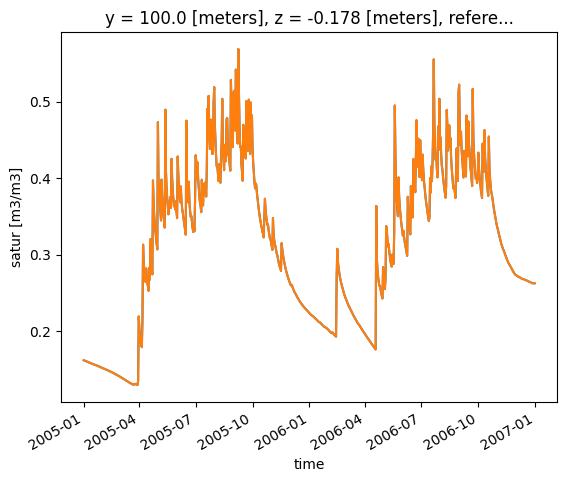

In [18]:
ds1.satur.sel(z=-.2,y=100,method='nearest').plot()
ds2.satur.sel(z=-.2,y=100,method='nearest').plot()

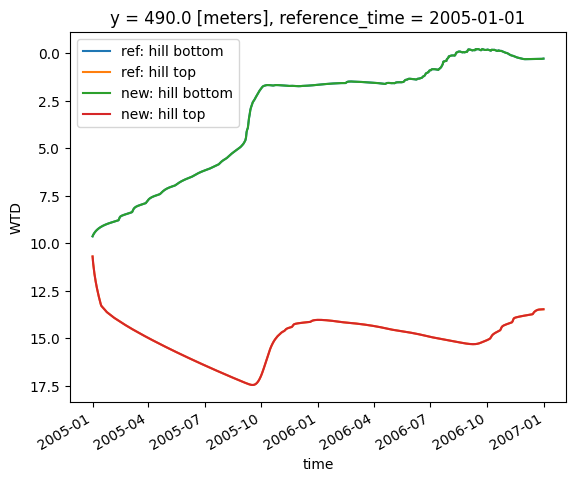

In [19]:
from matplotlib import pyplot as plt
ds1.WTD.isel(y=0).plot(label='ref: hill bottom')
ds1.WTD.isel(y=49).plot(label='ref: hill top')
ds2.WTD.isel(y=0).plot(label='new: hill bottom')
ds2.WTD.isel(y=49).plot(label='new: hill top')
plt.gca().legend()
plt.gca().invert_yaxis()

## Lecture des variables CLM (evapotranspiration, notamment)
Dans le manuel, les variables CLM écrites sont :
- *eflx_lh_tot* for latent heat flux total [W/m 2 ] 
- *eflx_lwrad_out* for outgoing long-wave radiation [W/m 2 ] 
- *eflx_sh_tot* for sensible heat flux total [W/m 2 ] 
- *eflx_soil_grnd* for ground heat flux [W/m 2 ] 
- *qflx_evap_tot* for total evaporation [mm/s] 
- *qflx_evap_grnd* for ground evaporation without condensation [mm/s] 
- *qflx_evap_soi* for soil evaporation [mm/s] 
- *qflx_evap_veg* for vegetation evaporation [mm/s] 
- *qflx_tran_veg* for vegetation transpiration [mm/s]
- *qflx_infl* for soil infiltration [mm/s]
- *swe_out* for snow water equivalent [mm]
- *t_grnd* for ground surface temperature [K]
- *t_soil* for soil temperature over all layers [K] 

In [20]:
def read_clm_outputs(wdir,date_start="2005-01-01"):
    files = np.sort(glob.glob(wdir+'*.clm_output.*.pfb'))
    clms = read_pfb_sequence(files)
    # create dataset
    ds = xr.Dataset({"lh_tot": (("time","y"), clms[:,0,:,0]),
                    "lwrad_out": (("time","y"), clms[:,1,:,0]),
                    "sh_tot": (("time","y"), clms[:,2,:,0]),
                    "soil_grnd": (("time","y"), clms[:,3,:,0]),
                    "evap_tot": (("time","y"), clms[:,4,:,0]*60*60),
                    "evap_grnd": (("time","y"), clms[:,5,:,0]*60*60),
                    "evap_soi": (("time","y"), clms[:,6,:,0]*60*60),
                    "evap_veg": (("time","y"), clms[:,7,:,0]*60*60),
                    "tran_veg": (("time","y"), clms[:,8,:,0]*60*60),
                    "infl": (("time","y"), clms[:,9,:,0]*60*60),
                    "swe_out": (("time","y"), clms[:,10,:,0]),
                    "t_grnd": (("time","y"), clms[:,11,:,0]),
                    "htop": (("time","y"), clms[:,12,:,0])},

        coords={"y":np.arange(start = h['y'],stop = h['y']+h['ny']*h['dy'],step=h['dy']),
            "time": pd.date_range(date_start, periods=len(files),freq='1H'),
            "reference_time": pd.Timestamp(date_start)})

    ds.lh_tot.attrs['units']='$W/m^2$'
    ds.lwrad_out.attrs['units']='$W/m^2$'
    ds.sh_tot.attrs['units']='$W/m^2$'
    ds.soil_grnd.attrs['units']='$W/m^2$'
    ds.evap_tot.attrs['units']='mm/h'
    ds.evap_grnd.attrs['units']='mm/h'
    ds.evap_soi.attrs['units']='mm/h'
    ds.evap_veg.attrs['units']='mm/h'
    ds.tran_veg.attrs['units']='mm/h'
    ds.infl.attrs['units']='mm/h'
    ds.swe_out.attrs['units']='mm'
    ds.t_grnd.attrs['units']='K'
    ds.htop.attrs['units']='m'

    ds.y.attrs['units']='meters'
    return ds

In [21]:
dc1 = read_clm_outputs(root_dir+'results_benchmark/')
dc2 = read_clm_outputs(root_dir+'results_nowaterstress/')

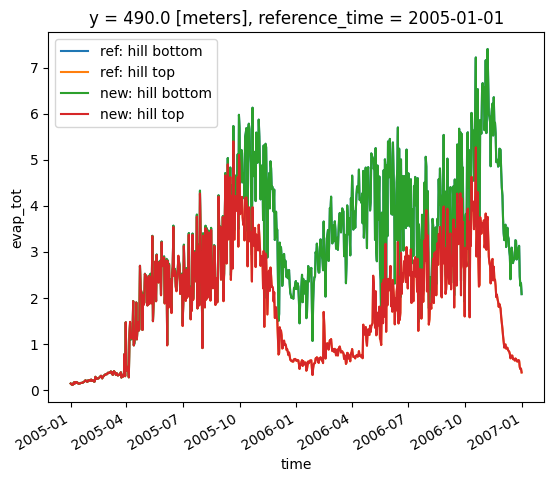

In [22]:
from matplotlib import pyplot as plt
dc1.evap_tot.isel(y=0).resample(time='D').sum().plot(label='ref: hill bottom')
dc1.evap_tot.isel(y=49).resample(time='D').sum().plot(label='ref: hill top')
dc2.evap_tot.isel(y=0).resample(time='D').sum().plot(label='new: hill bottom')
dc2.evap_tot.isel(y=49).resample(time='D').sum().plot(label='new: hill top')
plt.gca().legend()

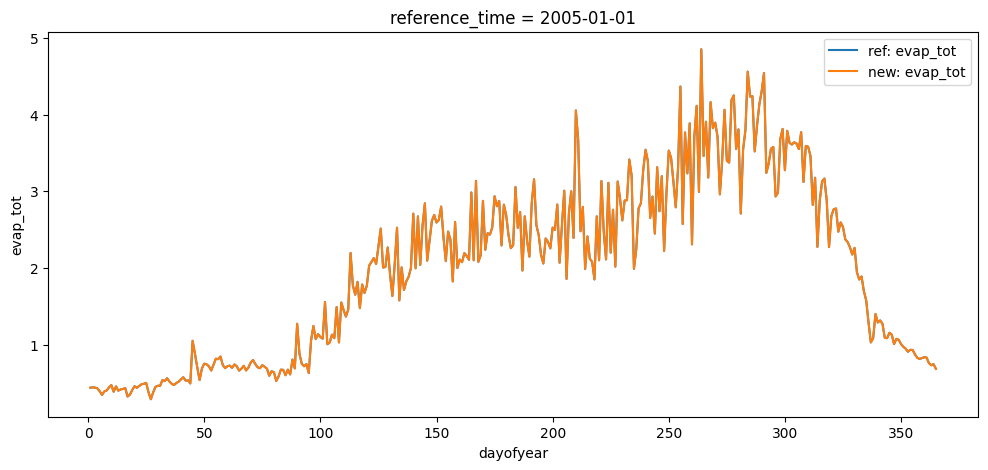

In [23]:
fig, ax = plt.subplots(figsize=(12,5))
dc1.evap_tot.mean(dim='y').resample(time='D').sum().groupby('time.dayofyear').mean().plot(label='ref: evap_tot')
dc2.evap_tot.mean(dim='y').resample(time='D').sum().groupby('time.dayofyear').mean().plot(label='new: evap_tot')
a = plt.gca()
a.legend()